In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
# Load the dataset
data = pd.read_csv('churn.csv')  


In [4]:
# Display the first few rows of the dataset
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [5]:
# EDA: Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# EDA: Descriptive statistics
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


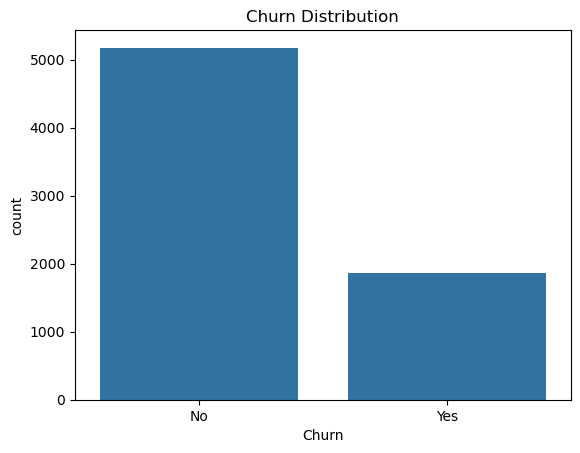

In [7]:
# EDA: Churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

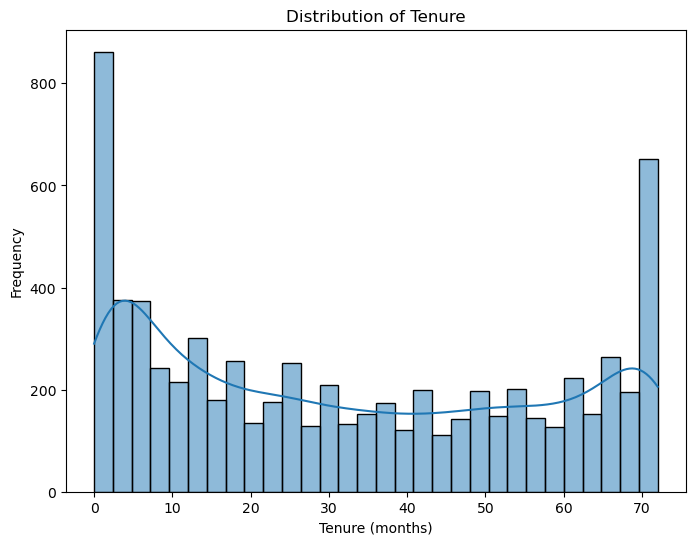

In [8]:
# EDA: Visualize the distribution of tenure (how long the customer has been with the company)
plt.figure(figsize=(8, 6))
sns.histplot(data['Tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

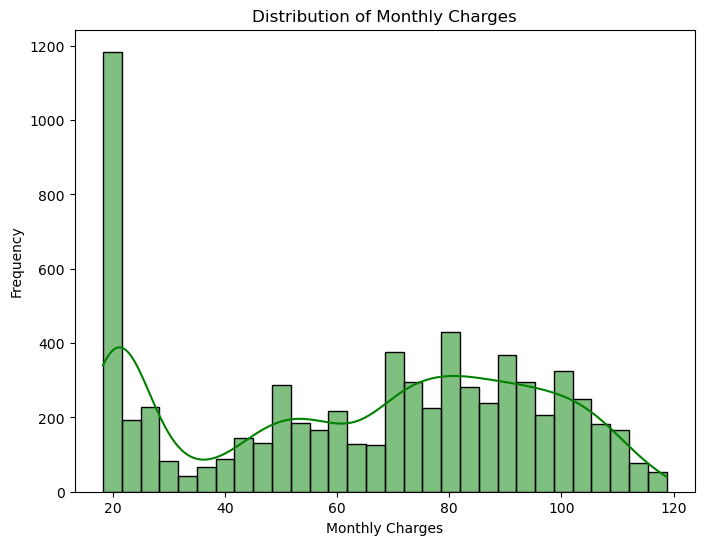

In [9]:
# EDA: Monthly charges distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['MonthlyCharges'], kde=True, color='green', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

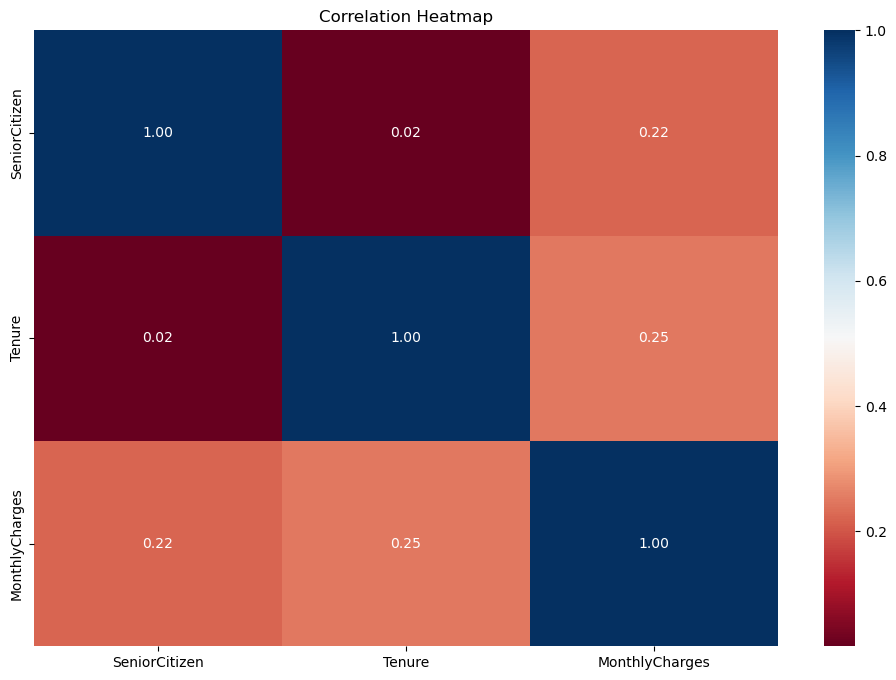

In [10]:
# EDA: Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

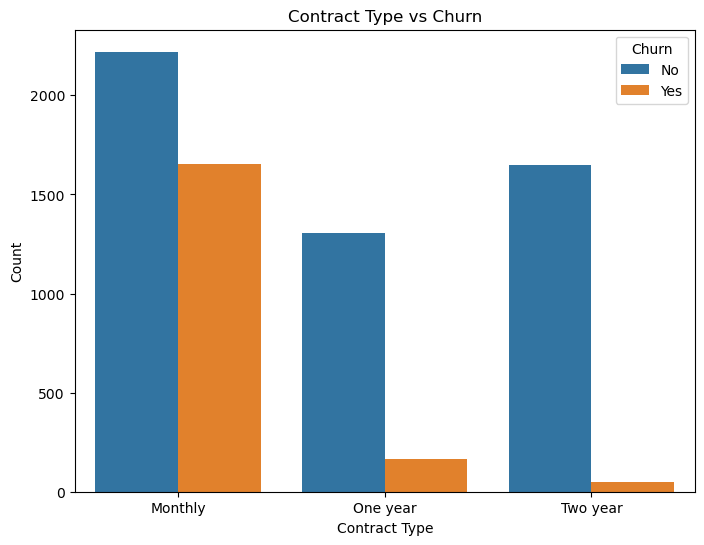

In [11]:
# EDA: Countplot of Contract type vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

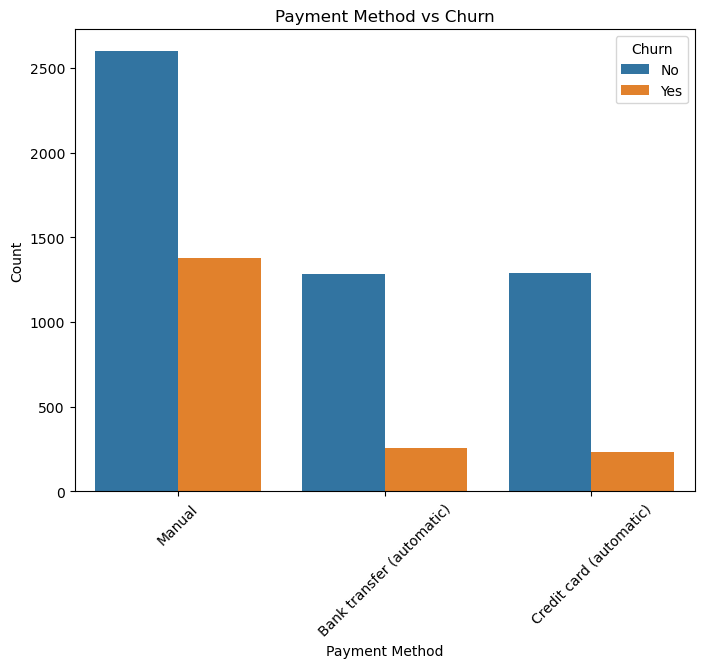

In [12]:
# EDA: Countplot of Payment Method vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

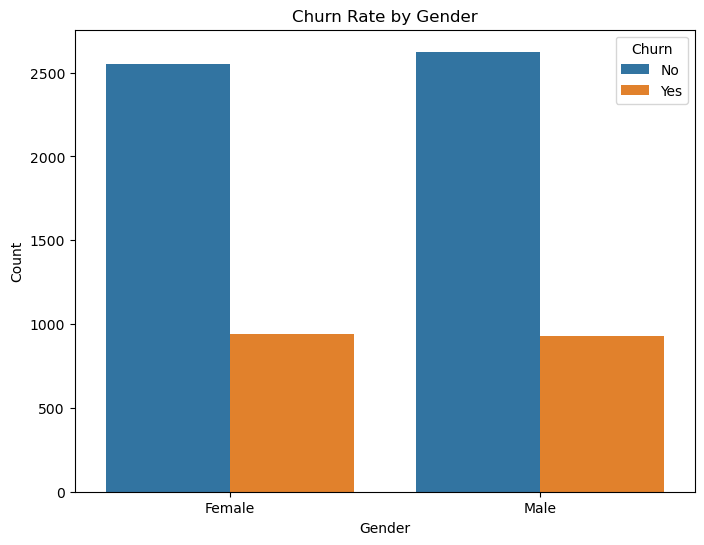

In [13]:
# 1. Churn Rate by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

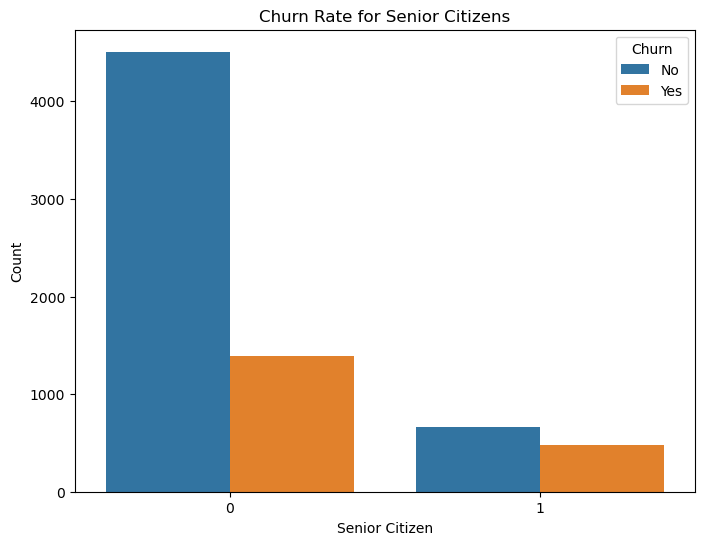

In [14]:
# 2. Senior Citizens vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn Rate for Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

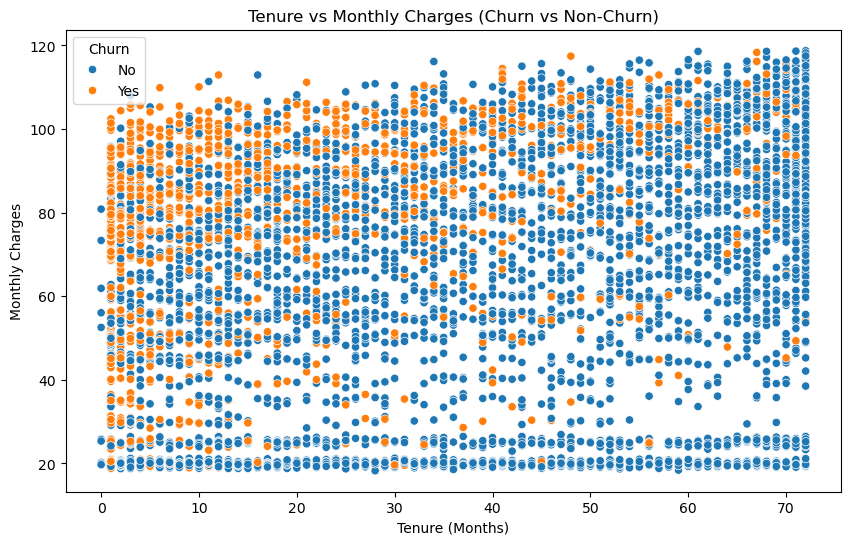

In [15]:
# 3. Tenure vs Monthly Charges for Churned and Non-Churned Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Tenure vs Monthly Charges (Churn vs Non-Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

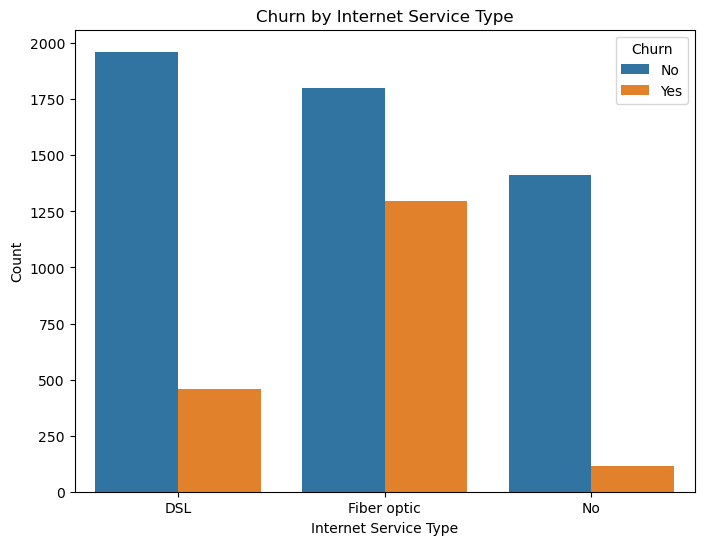

In [16]:

# 4. Churn by Internet Service Type
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


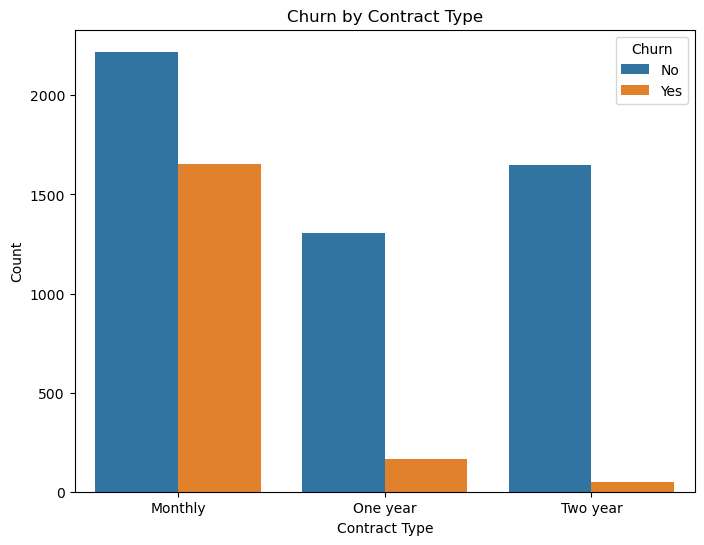

In [17]:
# 5. Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


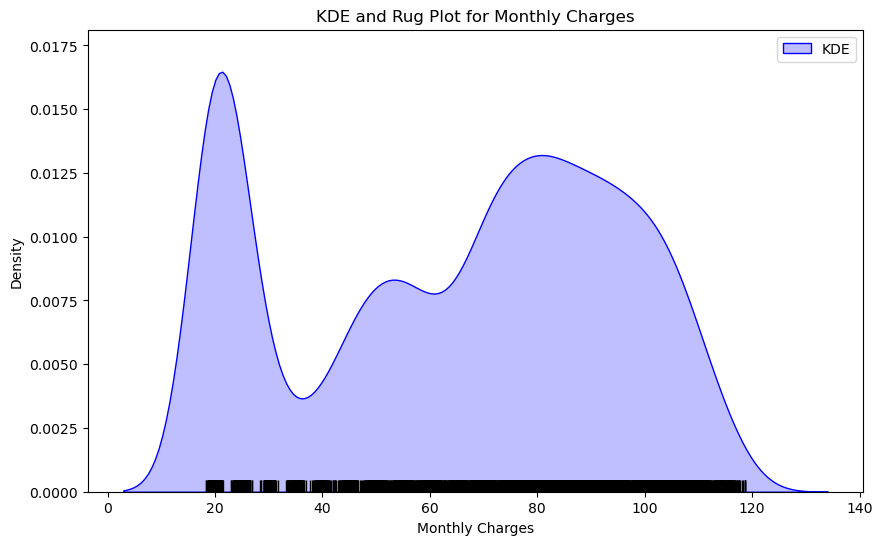

In [20]:
# 1. KDE Plot (Kernel Density Estimate) with a Rug Plot for Monthly Charges
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data['MonthlyCharges'], shade=True, color="blue", label='KDE')
sns.rugplot(data['MonthlyCharges'], color="black")
plt.title('KDE and Rug Plot for Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

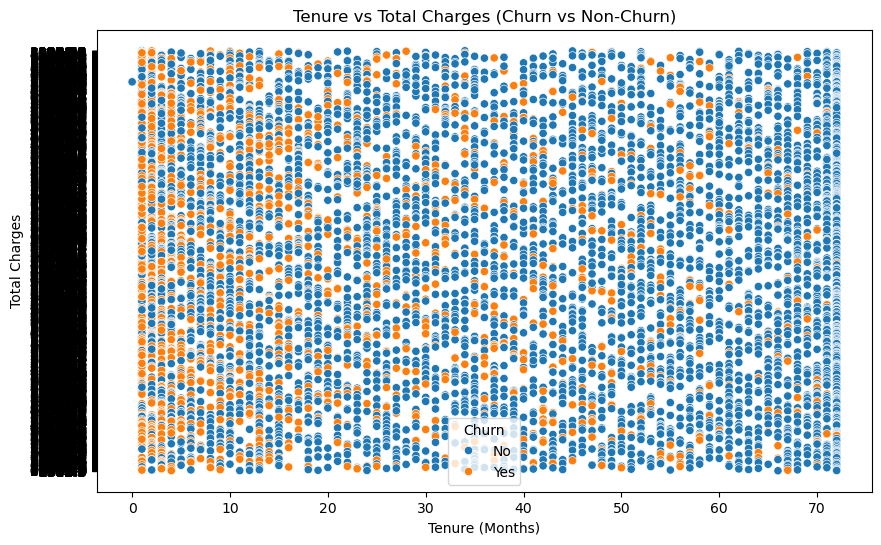

In [21]:
# 2. Scatter Plot: Tenure vs Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='TotalCharges', hue='Churn', data=data)
plt.title('Tenure vs Total Charges (Churn vs Non-Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.show()

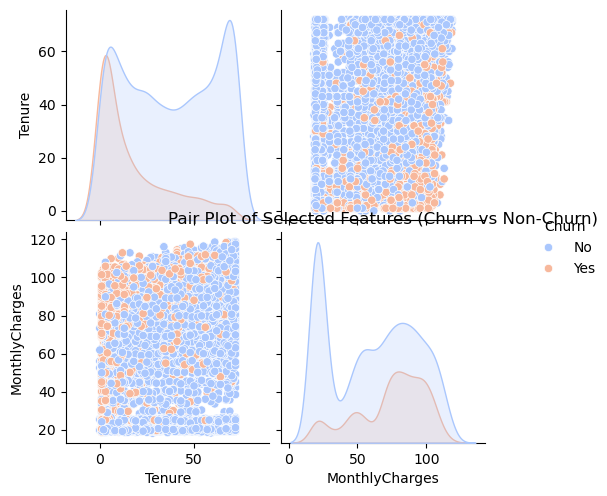

In [22]:
# 3. Pair Plot: Relationships between Features
# Select a subset of features for pair plotting (for simplicity)
selected_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(data[selected_features], hue='Churn', palette='coolwarm')
plt.title('Pair Plot of Selected Features (Churn vs Non-Churn)')
plt.show()

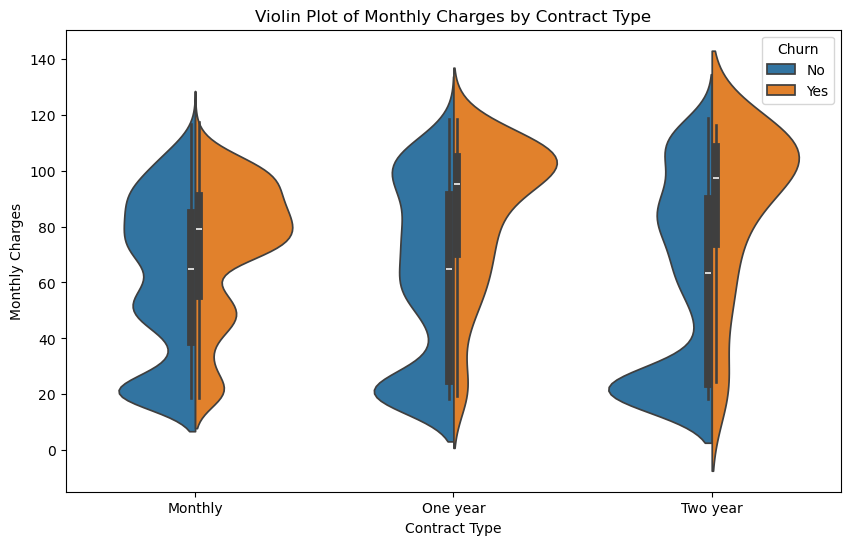

In [23]:
# 4. Violin Plot: Distribution of Monthly Charges by Contract Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', split=True, data=data)
plt.title('Violin Plot of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()


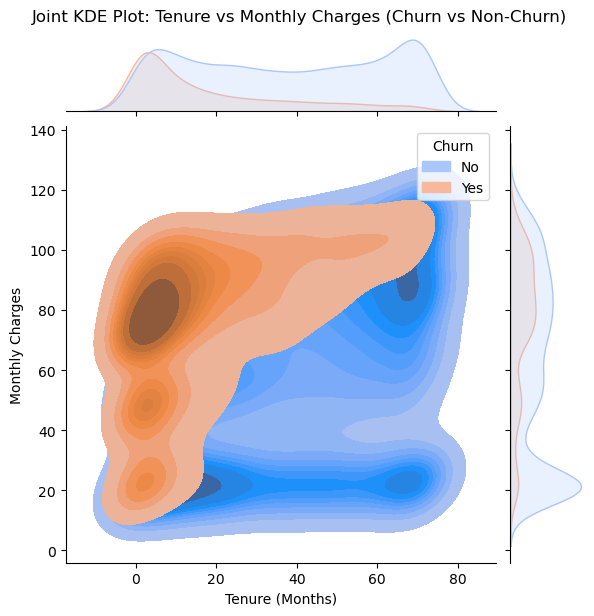

In [24]:
# 5. Joint Plot: Tenure vs Monthly Charges with KDE
sns.jointplot(x='Tenure', y='MonthlyCharges', data=data, kind='kde', hue='Churn', palette='coolwarm', fill=True)
plt.suptitle('Joint KDE Plot: Tenure vs Monthly Charges (Churn vs Non-Churn)', y=1.02)
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()


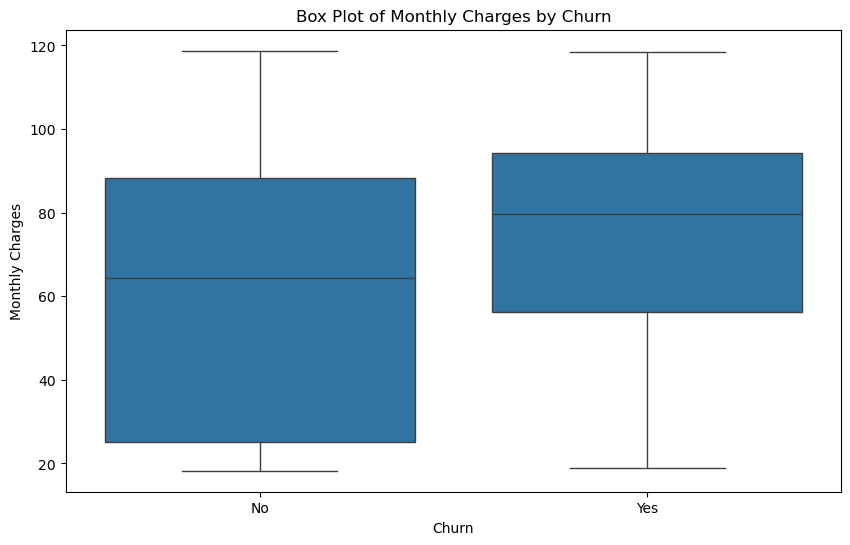

In [25]:
# 1. Box Plot: Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

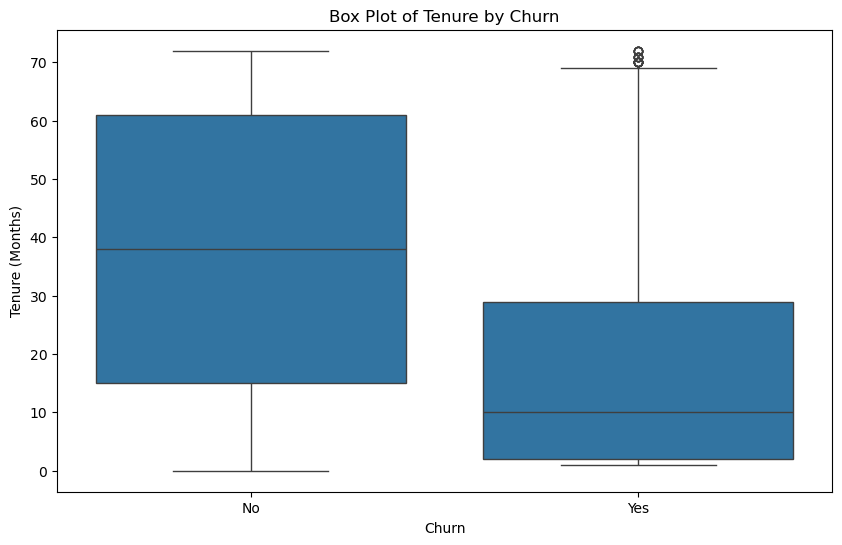

In [26]:
# 2. Box Plot: Tenure by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=data)
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

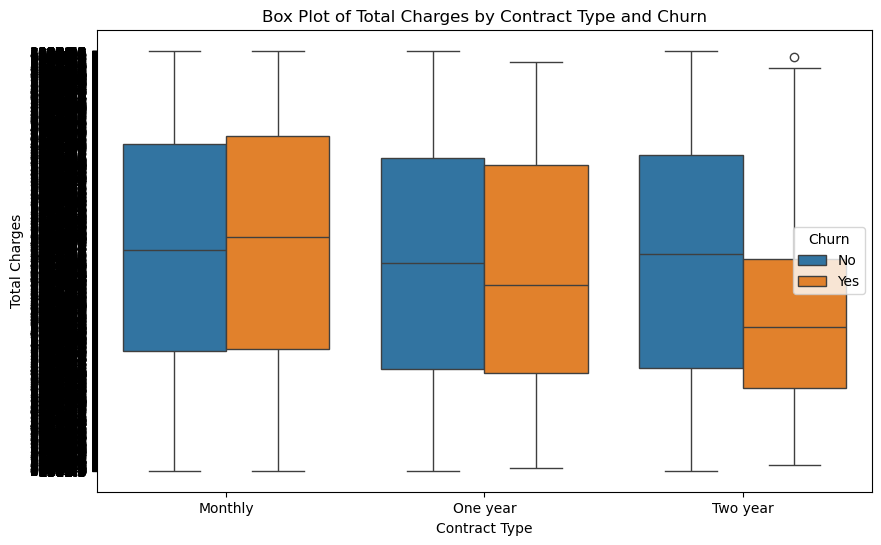

In [27]:
# 3. Box Plot: Total Charges by Contract Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=data)
plt.title('Box Plot of Total Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.show()

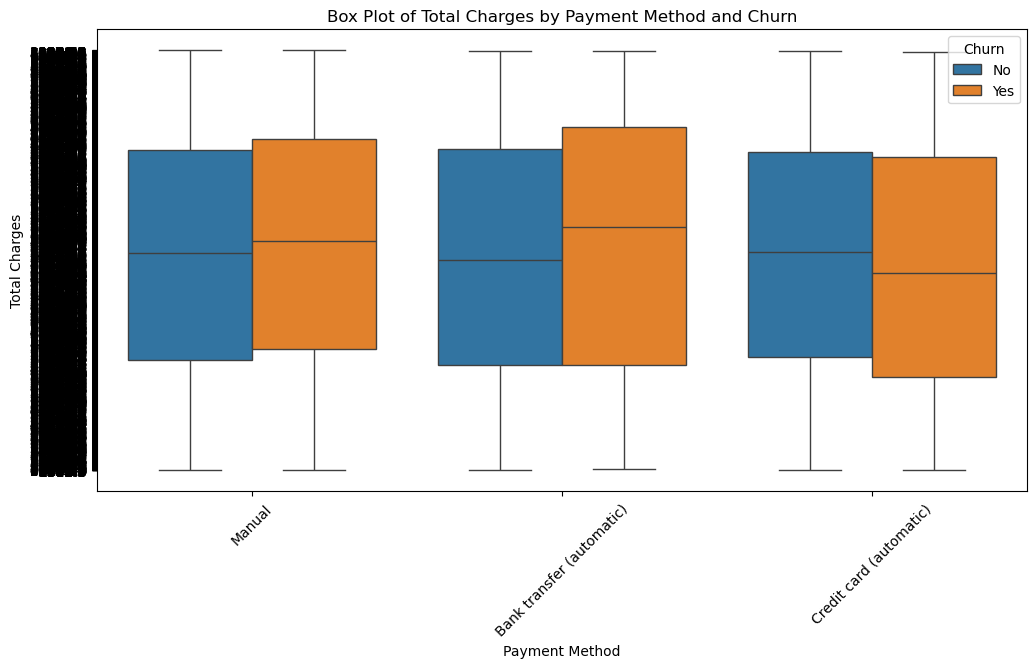

In [28]:
# 4. Box Plot: Total Charges by Payment Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentMethod', y='TotalCharges', hue='Churn', data=data)
plt.title('Box Plot of Total Charges by Payment Method and Churn')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Payment Method')
plt.ylabel('Total Charges')
plt.show()

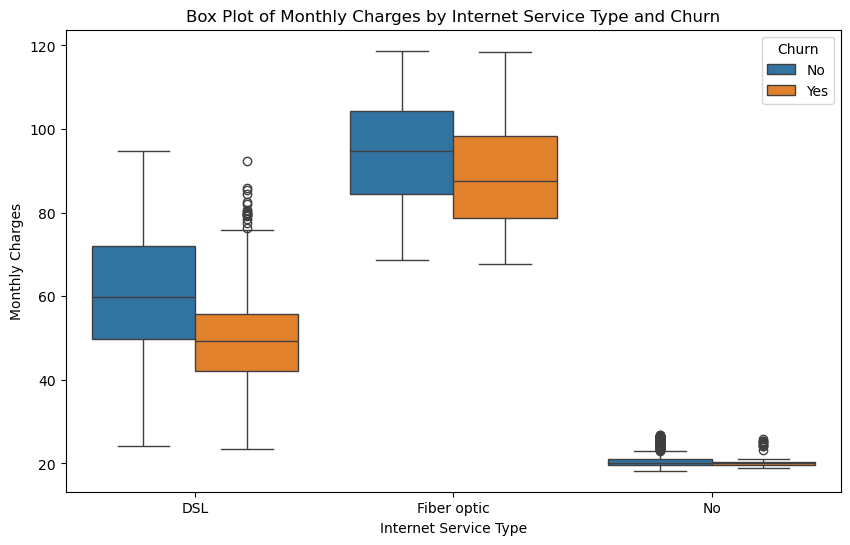

In [29]:
# 5. Box Plot: Monthly Charges by Internet Service Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Box Plot of Monthly Charges by Internet Service Type and Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Monthly Charges')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Handling missing values
# If 'TotalCharges' has any missing values, we can fill or drop them
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# 2. Encoding categorical variables
# We will use LabelEncoder for binary categorical columns and OneHotEncoder for multiclass
label_encoder = LabelEncoder()

# Encoding binary columns
binary_columns = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

# One-hot encoding for multi-class categorical columns
data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                     'Contract', 'PaymentMethod'], drop_first=True)

# 3. Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 4. Splitting the dataset into training and testing sets
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared!")


Training and testing data prepared!


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing: Encode categorical variables
label_encoders = {}  # Dictionary to store label encoders for each column
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the label encoder for potential inverse transformation later

# Split the data into features (X) and target (y)
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']               # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5634, 23)
X_test shape: (1409, 23)
y_train shape: (5634,)
y_test shape: (1409,)


# Step 8.1: Logistic Regression Model

Logistic Regression Accuracy: 0.8211
Confusion Matrix:
[[942  94]
 [158 215]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



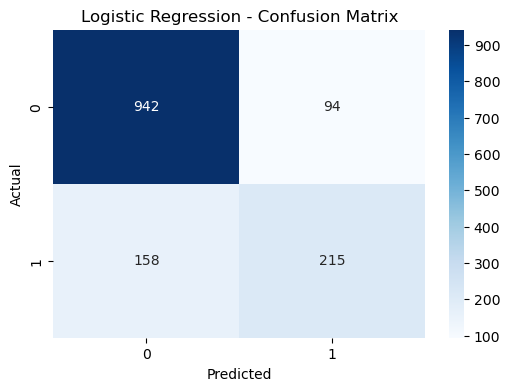

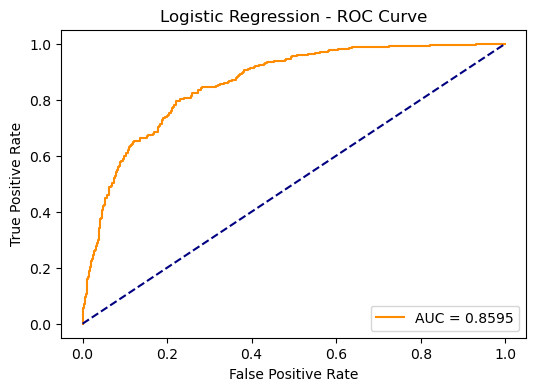

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.2: K-Nearest Neighbors (KNN) Model

KNN Accuracy: 0.6948
Confusion Matrix:
[[911 125]
 [305  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1036
           1       0.35      0.18      0.24       373

    accuracy                           0.69      1409
   macro avg       0.55      0.53      0.52      1409
weighted avg       0.64      0.69      0.66      1409



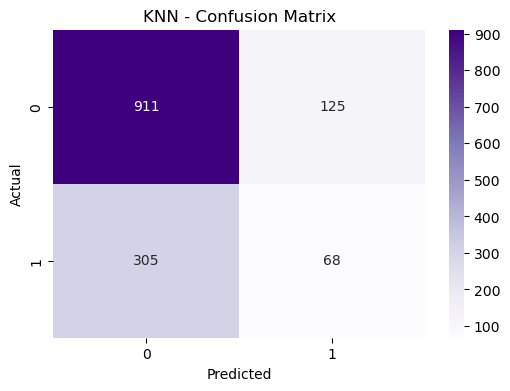

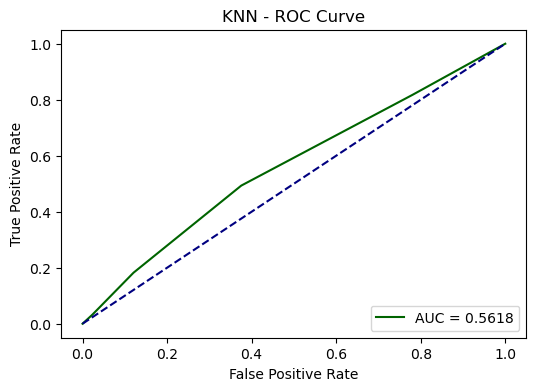

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkgreen')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.3: Decision Tree Model

Decision Tree Accuracy: 0.7218
Confusion Matrix:
[[827 209]
 [183 190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



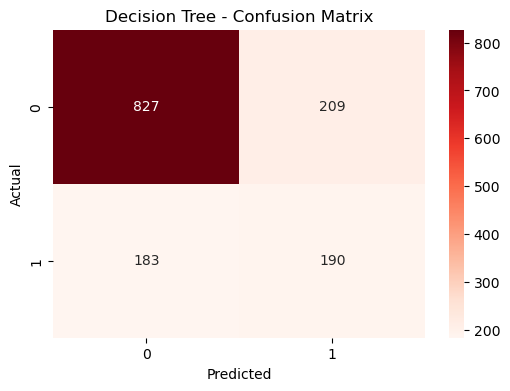

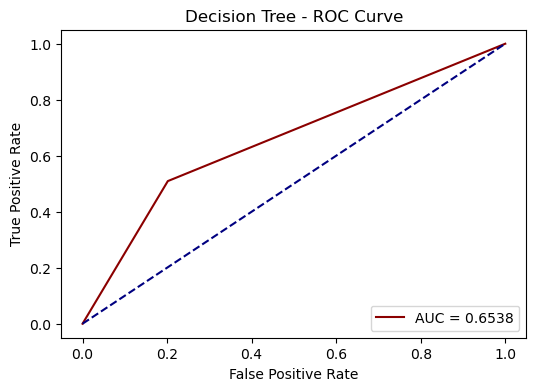

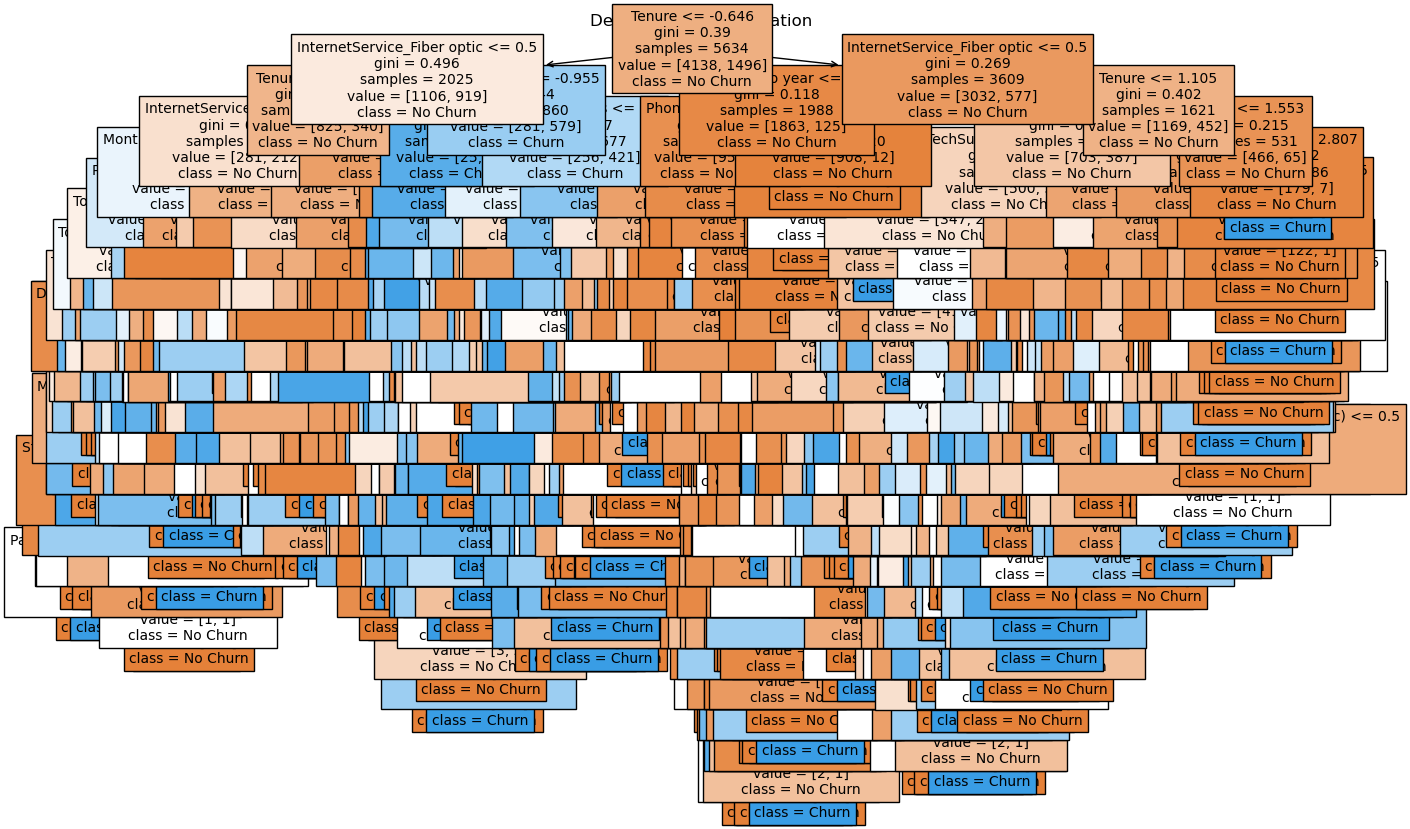

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn import tree

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Reds')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkred')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


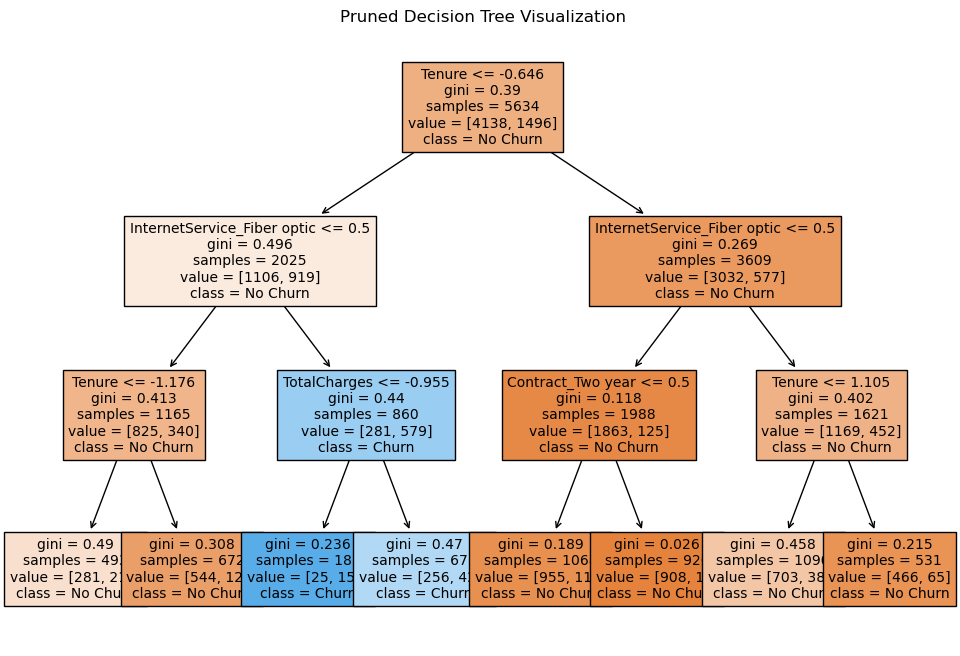

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize Decision Tree model with max depth and max leaf nodes
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3, max_leaf_nodes=8)

# Train the model
dt_model.fit(X_train, y_train)

# Plotting the Decision Tree with specified depth and leaf nodes
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], fontsize=10)
plt.title('Pruned Decision Tree Visualization')
plt.show()


# Step 8.4: Random Forest Model

Random Forest Accuracy: 0.7935
Confusion Matrix:
[[935 101]
 [190 183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



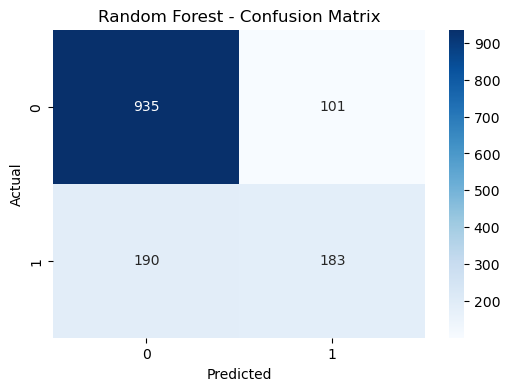

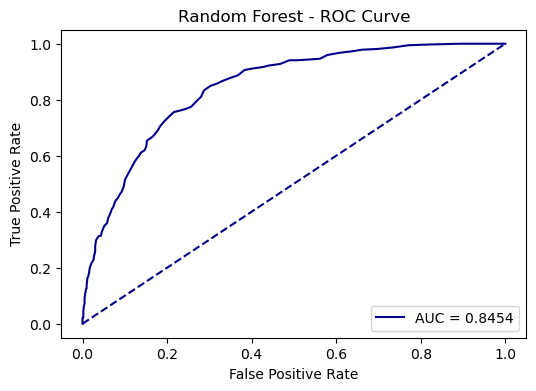

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkblue')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.5: Support Vector Machine (SVM)

SVM Accuracy: 0.7353
Confusion Matrix:
[[1036    0]
 [ 373    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



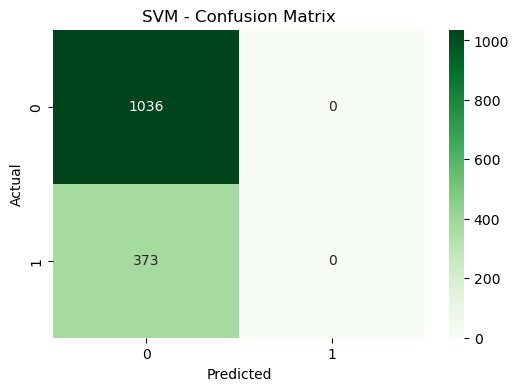

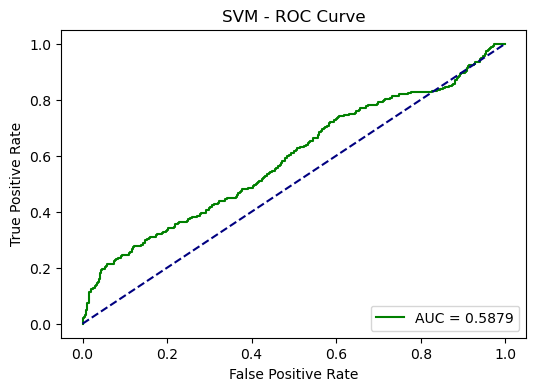

In [37]:
from sklearn.svm import SVC

# Initialize Support Vector Machine model
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='green')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.6: K-Nearest Neighbors (KNN)

KNN Accuracy: 0.6948
Confusion Matrix:
[[911 125]
 [305  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1036
           1       0.35      0.18      0.24       373

    accuracy                           0.69      1409
   macro avg       0.55      0.53      0.52      1409
weighted avg       0.64      0.69      0.66      1409



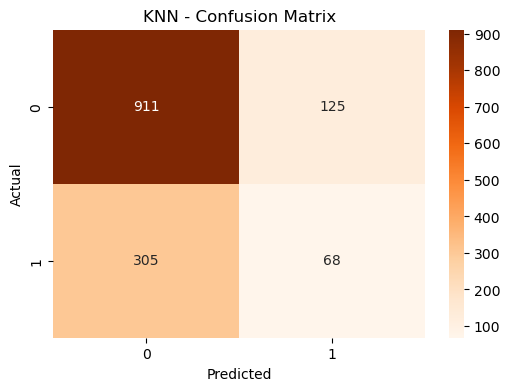

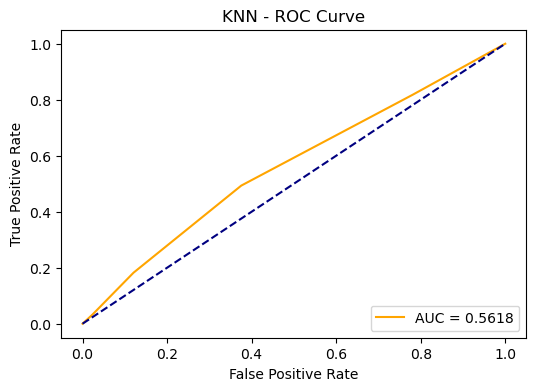

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.7: Logistic Regression

Logistic Regression Accuracy: 0.8211
Confusion Matrix:
[[942  94]
 [158 215]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



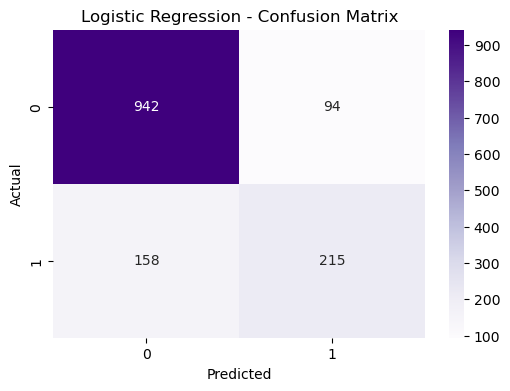

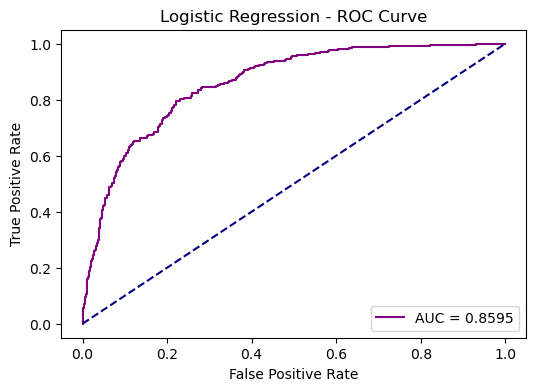

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Purples')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='purple')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.8: Gradient Boosting Classifier

Gradient Boosting Accuracy: 0.8112
Confusion Matrix:
[[940  96]
 [170 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



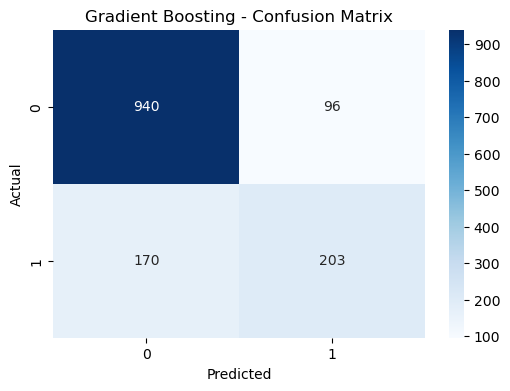

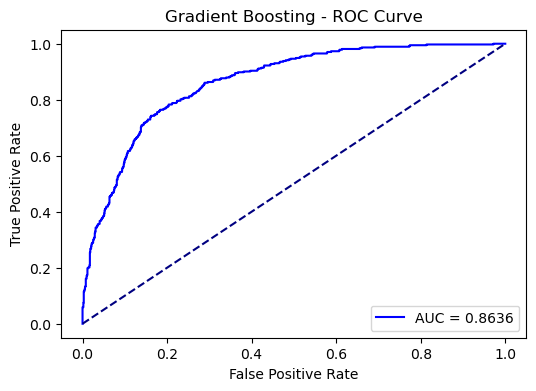

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluation
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Step 8.9: Random Forest Classifier

Random Forest Accuracy: 0.7935
Confusion Matrix:
[[935 101]
 [190 183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



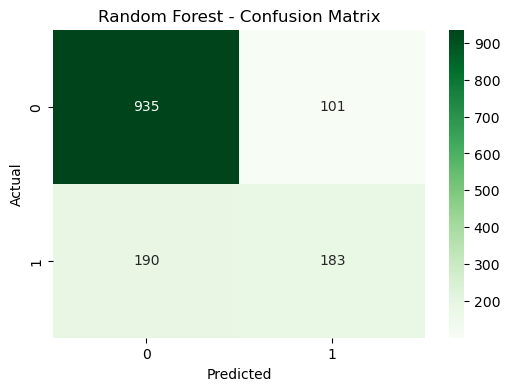

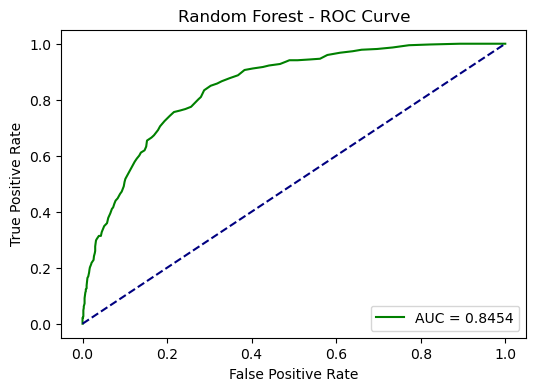

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='green')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()


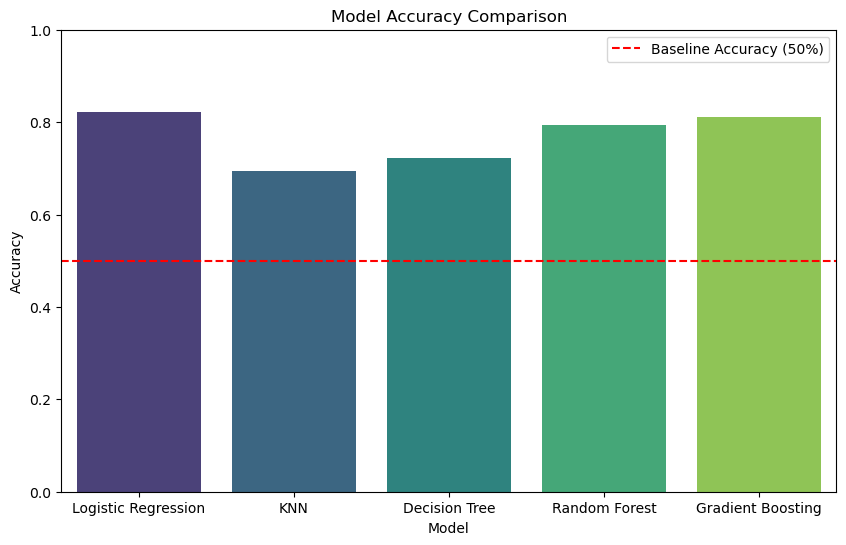

In [42]:
# Summarize the accuracies of all models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
model_accuracies = [lr_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, gb_accuracy]

# Create a DataFrame for better visualization
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_accuracies
})

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline Accuracy (50%)')
plt.legend()
plt.show()


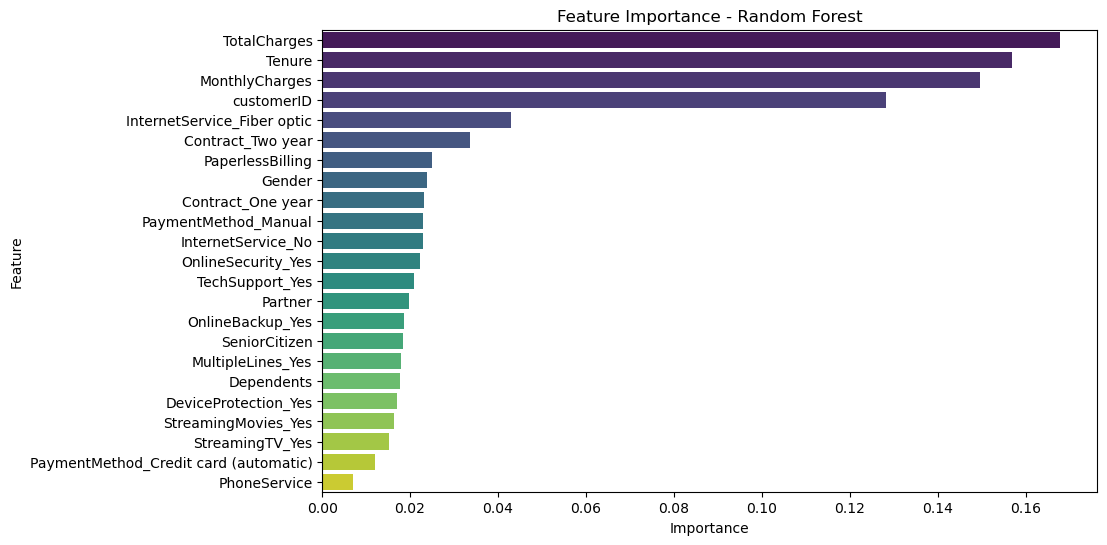

In [43]:
# Feature Importance from Random Forest
importances_rf = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


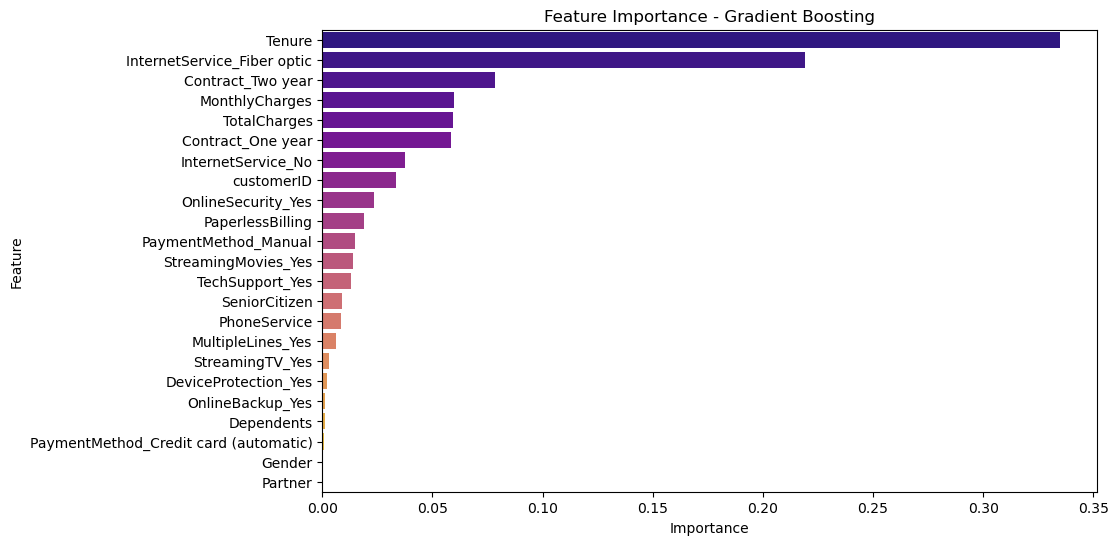

In [44]:
# Feature Importance from Gradient Boosting
importances_gb = gb_model.feature_importances_

# Create a DataFrame for feature importance
gb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=gb_importance_df, x='Importance', y='Feature', palette='plasma')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=rf_param_grid,
                               scoring='accuracy',
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Cross-Validation Score for Random Forest:", rf_grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.8024482230918469


In [46]:
# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                               param_grid=gb_param_grid,
                               scoring='accuracy',
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

# Fit the model
gb_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best Cross-Validation Score for Gradient Boosting:", gb_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score for Gradient Boosting: 0.8015618572705165


# Step 11: Retrain Models with Best Hyperparameters

Best Random Forest Accuracy: 0.8070
Confusion Matrix:
[[946  90]
 [182 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



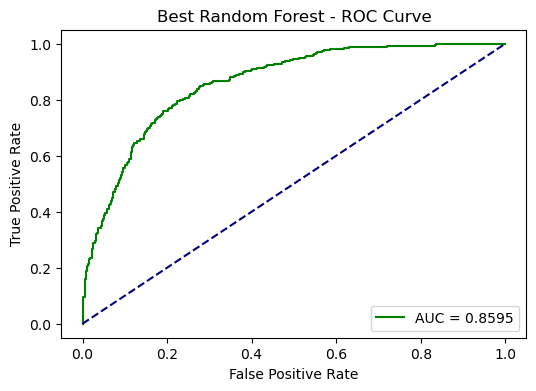

In [47]:
# Retraining the Random Forest model with best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    max_depth=rf_grid_search.best_params_['max_depth'],
    min_samples_split=rf_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# Fit the model
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluation
rf_best_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {rf_best_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# ROC Curve and AUC
y_pred_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_best_rf)
roc_auc_best_rf = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_best_rf:.4f}', color='green')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()


Best Gradient Boosting Accuracy: 0.8112
Confusion Matrix:
[[949  87]
 [179 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



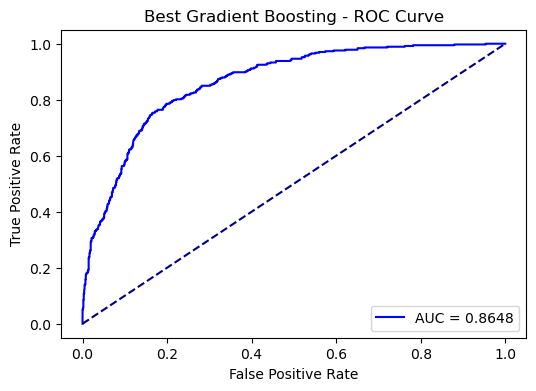

In [48]:
# Retraining the Gradient Boosting model with best hyperparameters
best_gb_model = GradientBoostingClassifier(
    n_estimators=gb_grid_search.best_params_['n_estimators'],
    learning_rate=gb_grid_search.best_params_['learning_rate'],
    max_depth=gb_grid_search.best_params_['max_depth'],
    min_samples_split=gb_grid_search.best_params_['min_samples_split'],
    random_state=42
)

# Fit the model
best_gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluation
gb_best_accuracy = accuracy_score(y_test, y_pred_best_gb)
print(f"Best Gradient Boosting Accuracy: {gb_best_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_gb))

# ROC Curve and AUC
y_pred_prob_best_gb = best_gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_best_gb)
roc_auc_best_gb = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_best_gb:.4f}', color='blue')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Gradient Boosting - ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [49]:
import pandas as pd

# Accuracy scores for each model
model_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'Best Random Forest',
    'Best Gradient Boosting'
]

# Assuming you have stored the accuracies in variables
accuracies = [
    lr_accuracy,  # Logistic Regression
    knn_accuracy,  # K-Nearest Neighbors
    dt_accuracy,   # Decision Tree
    rf_accuracy,   # Random Forest
    gb_accuracy,   # Gradient Boosting
    rf_best_accuracy,  # Best Random Forest
    gb_best_accuracy   # Best Gradient Boosting
]

# Creating a DataFrame
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Display the DataFrame
print(accuracy_df)


                    Model  Accuracy
0     Logistic Regression  0.821150
1     K-Nearest Neighbors  0.694819
2           Decision Tree  0.721789
3           Random Forest  0.793471
4       Gradient Boosting  0.811214
5      Best Random Forest  0.806955
6  Best Gradient Boosting  0.811214


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# Store evaluation metrics in a list
evaluation_metrics = []

# Example for Logistic Regression (repeat for other models)
y_pred_lr = lr_model.predict(X_test)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
lr_cm = confusion_matrix(y_test, y_pred_lr)

evaluation_metrics.append({
    'Model': 'Logistic Regression',
    'Accuracy': lr_report['accuracy'],
    'Precision': lr_report['1']['precision'],
    'Recall': lr_report['1']['recall'],
    'F1 Score': lr_report['1']['f1-score'],
    'Confusion Matrix': lr_cm
})

# Repeat the above process for each model
# Replace `lr_model`, `X_test`, `y_test` with the appropriate model and data for each case

# Example for K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_cm = confusion_matrix(y_test, y_pred_knn)

evaluation_metrics.append({
    'Model': 'K-Nearest Neighbors',
    'Accuracy': knn_report['accuracy'],
    'Precision': knn_report['1']['precision'],
    'Recall': knn_report['1']['recall'],
    'F1 Score': knn_report['1']['f1-score'],
    'Confusion Matrix': knn_cm
})

# Continue this for all models...

# Create DataFrame from the evaluation metrics list
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_df)


                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.821150   0.695793  0.576408  0.630499   
1  K-Nearest Neighbors  0.694819   0.352332  0.182306  0.240283   

          Confusion Matrix  
0  [[942, 94], [158, 215]]  
1  [[911, 125], [305, 68]]  


Epoch 1/50
141/141 [==============================] - 2s 7ms/step - loss: 0.4804 - accuracy: 0.7708 - val_loss: 0.4149 - val_accuracy: 0.8075
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4475 - accuracy: 0.7925 - val_loss: 0.4080 - val_accuracy: 0.8075
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.7903 - val_loss: 0.4092 - val_accuracy: 0.8004
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.8016 - val_loss: 0.4105 - val_accuracy: 0.8004
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4324 - accuracy: 0.7937 - val_loss: 0.4069 - val_accuracy: 0.8039
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.8025 - val_loss: 0.4085 - val_accuracy: 0.8039
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.8036 - val_loss: 0.4076 - val_accuracy: 0.7977
Epoch 

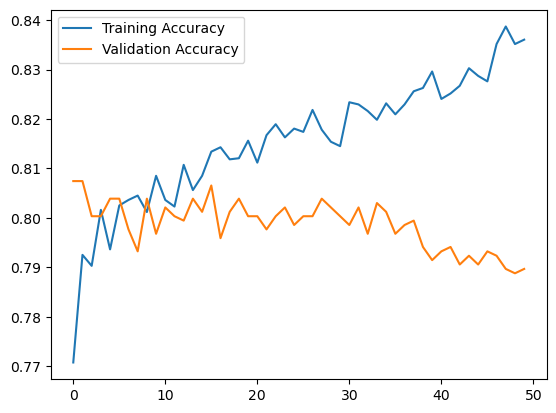

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Visualize training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
